In [ ]:
# Step 1: Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import os

In [ ]:
# Define dataset paths
train_dir  = "/content/drive/MyDrive/split_NewPreprocessedDataset/train"
val_dir = "/content/drive/MyDrive/split_NewPreprocessedDataset/val"
test_dir = "/content/drive/MyDrive/split_NewPreprocessedDataset/test"

# Image parameters
IMG_SIZE = 224
BATCH_SIZE = 16
NUM_CLASSES = 5  # 4 diseased + 1 healthy

In [ ]:
# Define data generators with normalization
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)  # Used for both validation and test

# Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Multi-class classification
    shuffle=True
)

# Validation Data
valid_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Test Data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 4375 images belonging to 5 classes.
Found 125 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [ ]:
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top of DenseNet201
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # For multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop if no improvement after 5 epochs
    restore_best_weights=True  # Restore model weights from the best epoch
)

steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, valid_generator.samples // valid_generator.batch_size)
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)


Epoch 1/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 899s 3s/step - accuracy: 0.6976 - loss: 0.8614 - val_accuracy: 0.9196 - val_loss: 0.2874
Epoch 2/50
  1/273 ━━━━━━━━━━━━━━━━━━━━ 27s 103ms/step - accuracy: 0.9375 - loss: 0.1571

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


273/273 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9375 - loss: 0.1571 - val_accuracy: 0.9196 - val_loss: 0.2903
Epoch 3/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 72s 125ms/step - accuracy: 0.9501 - loss: 0.2063 - val_accuracy: 0.9286 - val_loss: 0.2450
Epoch 4/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.3219 - val_accuracy: 0.9196 - val_loss: 0.2518
Epoch 5/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 82s 281ms/step - accuracy: 0.9744 - loss: 0.1234 - val_accuracy: 0.9375 - val_loss: 0.2302
Epoch 6/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.1074 - val_accuracy: 0.9375 - val_loss: 0.2365
Epoch 7/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 82s 286ms/step - accuracy: 0.9854 - loss: 0.0783 - val_accuracy: 0.9554 - val_loss: 0.1980
Epoch 8/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0905 - val_accuracy: 0.9554 - val_loss: 0.1904
Epoch 9/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 37s 127ms/step - accuracy: 0.9931 - loss: 0.0528 - val_accuracy: 

In [ ]:

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 108s 7s/step - accuracy: 0.9301 - loss: 0.1562
Test Accuracy: 0.9440000057220459


In [ ]:
model.save('/content/drive/MyDrive/model2/densenet201_model.keras')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# Create directory in Google Drive to save results
save_dir = "/content/drive/MyDrive/model2/"
os.makedirs(save_dir, exist_ok=True)

16/16 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step


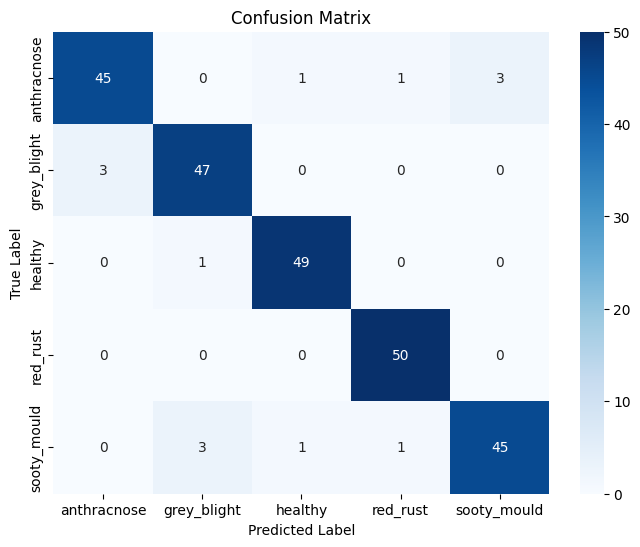

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report # Import confusion_matrix
# Compute confusion matrix

# Assuming 'test_generator' is defined from previous cells and is your test data generator
# Get true labels and predicted labels from your test data
y_true = test_generator.classes  # True labels
y_pred = tf.argmax(model.predict(test_generator), axis=-1) # Predicted labels

cm = confusion_matrix(y_true, y_pred)

# Get class names from the test generator
class_names = list(test_generator.class_indices.keys())  # Add this line

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Save confusion matrix to Google Drive
plt.savefig(f"{save_dir}/confusion_matrix.png")
plt.show()

In [ ]:
# Get predictions
y_true = test_generator.classes  # True labels
y_pred_prob = model.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert to class labels

# Print accuracy, precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
Classification Report:
              precision    recall  f1-score   support

 anthracnose       0.94      0.90      0.92        50
 grey_blight       0.92      0.94      0.93        50
     healthy       0.96      0.98      0.97        50
    red_rust       0.96      1.00      0.98        50
 sooty_mould       0.94      0.90      0.92        50

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

Confusion Matrix:
[[45  0  1  1  3]
 [ 3 47  0  0  0]
 [ 0  1 49  0  0]
 [ 0  0  0 50  0]
 [ 0  3  1  1 45]]


Results

In [ ]:

# Load the model later for inference
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/model2/densenet201_model.keras', safe_mode=False)  # Set safe_mode=False

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step


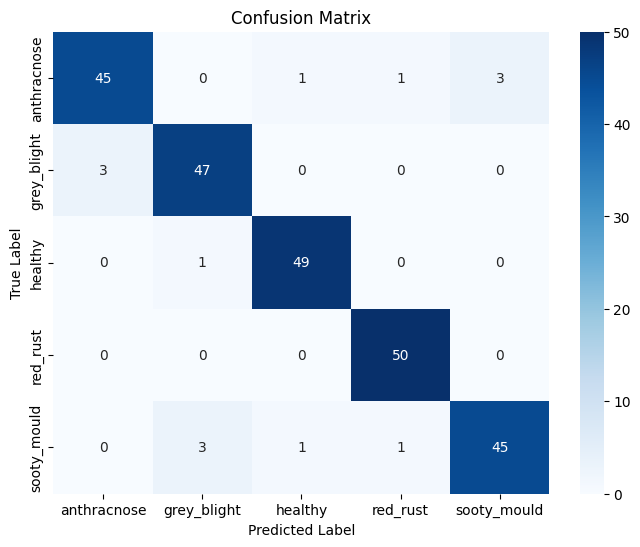

In [ ]:
# Get predictions
y_true = test_generator.classes  # True labels
y_pred_prob = model.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert to class labels


# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get class names from the test generator
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Save confusion matrix to Google Drive
plt.savefig(f"{save_dir}/confusion_matrix.png")
plt.show()

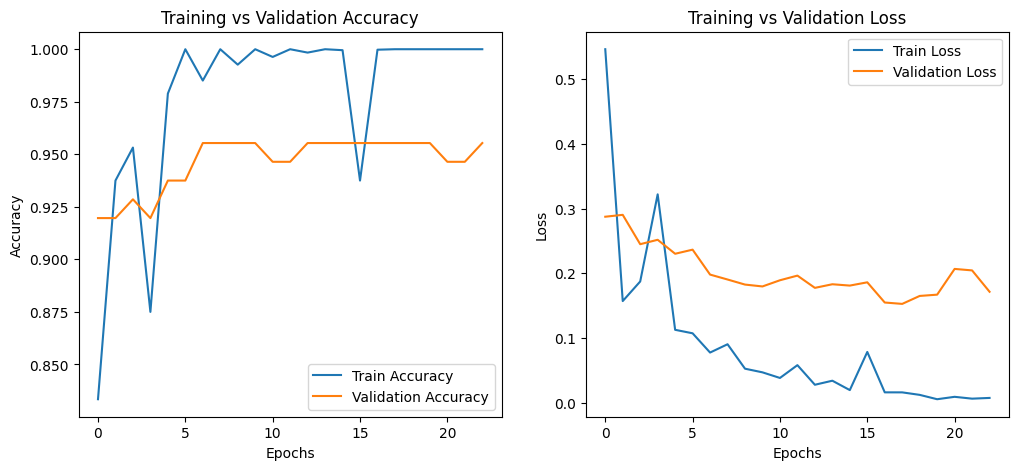

In [ ]:
import ast
import matplotlib.pyplot as plt

# Plot accuracy & loss graphs
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")  # Removed marker="o"
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")  # Removed marker="o"
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")  # Removed marker="o"
plt.plot(history.history["val_loss"], label="Validation Loss")  # Removed marker="o"
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

# Save accuracy & loss plots
save_dir = "/content/drive/MyDrive/model2/"
plt.savefig(f"{save_dir}/accuracy_loss_plot.png")
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step


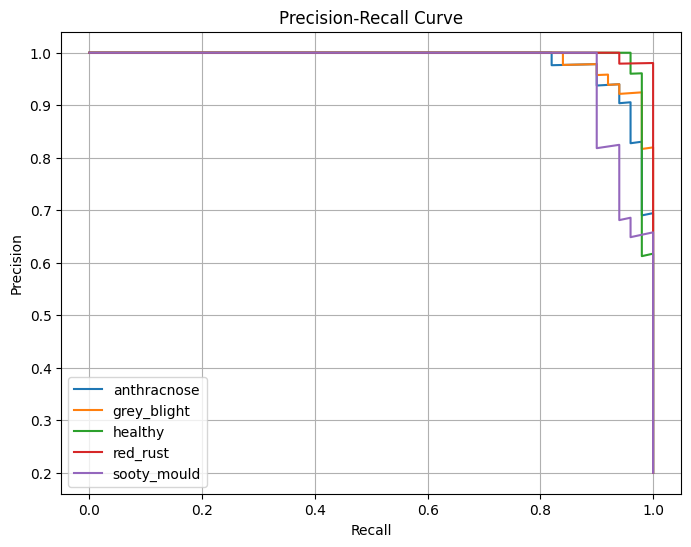

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get probabilities for test data
y_probs = model.predict(test_generator) # Use test_generator instead of test_data

plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    precision, recall, _ = precision_recall_curve(y_true == i, y_probs[:, i])
    plt.plot(recall, precision, label=class_names[i])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig(f"{save_dir}/precision_recall_curve.png")
plt.show()

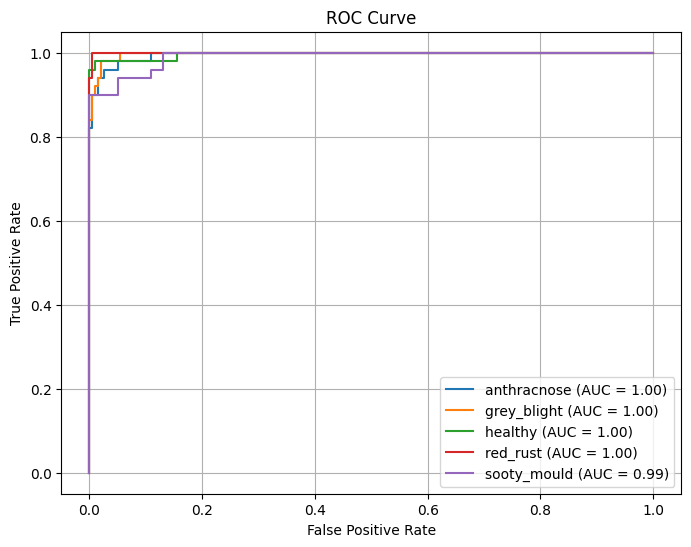

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true == i, y_probs[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {auc_score:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig(f"{save_dir}/roc_curve.png")
plt.show()

<ipython-input-46-457a5fed68ba>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=class_accuracy, palette="viridis")


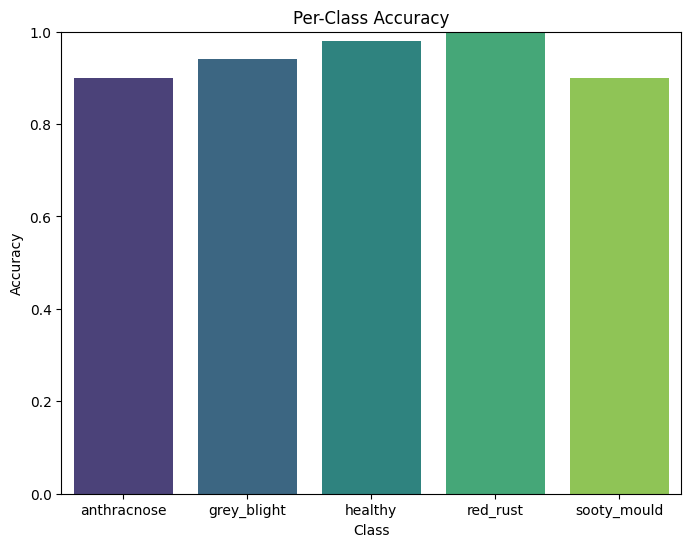

In [ ]:
import pandas as pd

# Compute per-class accuracy
cm_sum = np.sum(cm, axis=1)  # Total true samples per class
class_accuracy = cm.diagonal() / cm_sum  # Per-class accuracy

# Plot per-class accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=class_names, y=class_accuracy, palette="viridis")
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.ylim(0, 1)

# Save the bar chart
plt.savefig(f"{save_dir}/per_class_accuracy.png")
plt.show()

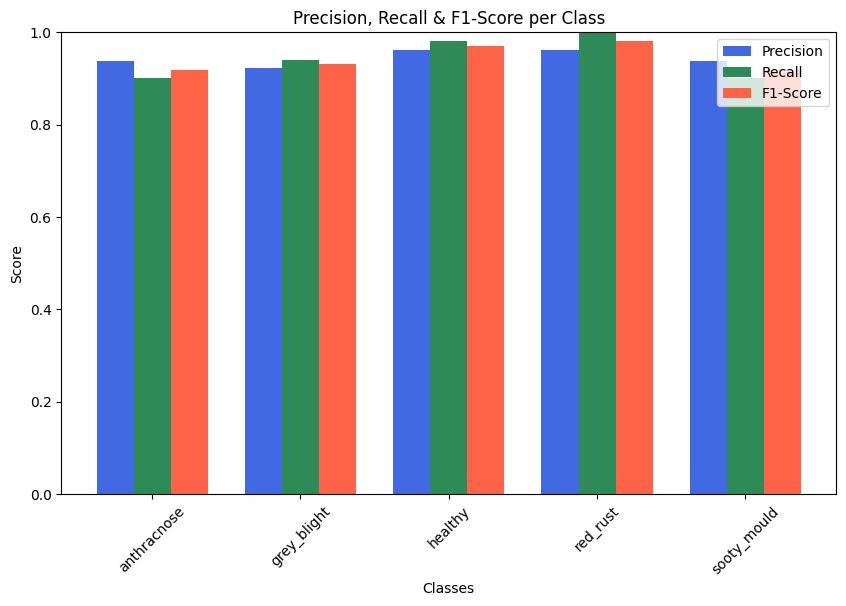

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Extract Precision, Recall, and F1-score for each class
precision = [report_dict[label]["precision"] for label in class_names]
recall = [report_dict[label]["recall"] for label in class_names]
f1_score = [report_dict[label]["f1-score"] for label in class_names]

# Set bar width
bar_width = 0.25
x = np.arange(len(class_names))

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=bar_width, label="Precision", color="royalblue")
plt.bar(x + bar_width, recall, width=bar_width, label="Recall", color="seagreen")
plt.bar(x + 2 * bar_width, f1_score, width=bar_width, label="F1-Score", color="tomato")

# Add labels
plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Precision, Recall & F1-Score per Class")
plt.xticks(x + bar_width, class_names, rotation=45)
plt.ylim(0, 1)
plt.legend()

# Save the figure to Google Drive
plt.savefig(f"{save_dir}/precision_recall_f1_bargraph.png")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Compute precision, recall, and F1-score
report = classification_report(y_true, y_pred, target_names=class_names)

# Print the report
print("📊 Precision, Recall & F1-Score Report:")
print(report)

# Save to Google Drive
report_path = f"{save_dir}/classification_report.txt"
with open(report_path, "w") as f:
    f.write(report)

print(f"✅ Precision, Recall & F1-score saved at: {report_path}")

📊 Precision, Recall & F1-Score Report:
              precision    recall  f1-score   support

 anthracnose       0.94      0.90      0.92        50
 grey_blight       0.92      0.94      0.93        50
     healthy       0.96      0.98      0.97        50
    red_rust       0.96      1.00      0.98        50
 sooty_mould       0.94      0.90      0.92        50

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

✅ Precision, Recall & F1-score saved at: /content/drive/MyDrive/model2//classification_report.txt
